## 考題一：運用地圖套件，對政府公開資料進行分析，並將分析資訊顯示在地圖上

In [ ]:
import requests
import csv

url = "https://data.ntpc.gov.tw/api/datasets/71CD1490-A2DF-4198-BEF1-318479775E8A/csv/file"
r = requests.get(url)

decoded_content = r.content.decode('utf-8')
cr = csv.reader(decoded_content.splitlines(), delimiter=',')
data_list = list(cr)


In [ ]:
# 使用colab還未安裝套件的，請反註解下面這一行，並安裝之
#!pip install geocoder

In [ ]:
import folium
import geocoder

# 使用 geocoder 取得特定住址的 GPS 座標
location = geocoder.osm('新北市').latlng

m = folium.Map(location=location, zoom_start=14)

for item in data_list[1:]:
    try:
        name = item[1]
        area = item[4]
        total = item[2]
        n = item[3]
        lat = item[6]
        lng = item[7]
        if int(n)<5 and int(n)>0:
            folium.Marker([float(lat), float(lng)], popup=name+'<br>剩餘車輛:%s/%s' %(n,total),
                        icon=folium.Icon(color='red', prefix='fa', icon='fa-bicycle')).add_to(m)
        elif int(n)==0:
            folium.Marker([float(lat), float(lng)], popup=name+'<br>剩餘車輛:%s/%s' %(n,total),
                        icon=folium.Icon(color='black', prefix='fa', icon='fa-window-close')).add_to(m)
        else:
            folium.Marker([float(lat), float(lng)], popup=name+'<br>剩餘車輛:%s/%s' %(n,total),
                        icon=folium.Icon(color='green', prefix='fa', icon='fa-bicycle')).add_to(m)
        
    except Exception as e:
        print(e.args)    

In [ ]:
m

In [ ]:
m.save('EX1.html')

- 使用colab請下載

In [ ]:
from google.colab import files
files.download('EX1.html')


----
## 考題二：收集高雄市政府公開資料的空氣品質資訊，並依時間序列繪製趨勢圖

In [1]:
import requests
import csv

url = 'https://data.kcg.gov.tw/dataset/e9aa2660-c4eb-46e1-a4fd-758f59c70e67/resource/ed5eacda-ee80-44b4-aa9a-88bbaf054512/download/2018humanstation.csv'

r = requests.get(url)
decoded_content = r.content.decode('utf-8')
cr = csv.reader(decoded_content.splitlines(), delimiter=',')
data_list = list(cr)

In [2]:
# 整理所有站的12個月的資料

month_list = {}
for i in range(12):
    month_list['2018年%d月' %(i+1)] = i+1
    
tsp_data = {}
for item in data_list[1:]:
    name = item[0]
    tsp_data[name] = [None]*12

for item in data_list[1:]:
    try:
        name = item[0]
        date = item[1]
        tsp = item[2]
        tsp_data[name][month_list[date]-1] = int(tsp)
    except Exception as e:
        print(name, date, tsp, str(e))
        print(e.args)    


In [3]:
tsp_data

{'仁武國中': [79, 86, 108, 78, 44, 48, 56, 19, 46, 91, 115, 134],
 '前鎮國小': [109, 86, 98, 82, 49, 79, 78, 43, 70, 110, 112, 111],
 '勞工博物館': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  77,
  None],
 '半屏山電信局': [104, 62, 69, 72, 40, 37, 32, 30, 26, 130, 104, 119],
 '大寮區公所': [79, 91, 92, 75, 43, 41, 44, 14, 31, 79, 98, 124],
 '大樹監測站': [61, 65, 79, 63, 37, 37, None, None, None, None, None, None],
 '大社工業區': [93, 102, 108, 79, 55, 58, 67, 26, 68, 101, 103, 147],
 '岡山醫院': [102, 84, 120, 82, 39, 20, 17, 32, 64, 104, 106, 121],
 '左營國小': [98, 59, 54, 61, 49, 22, 37, 22, 32, 89, 65, 90],
 '愛國國小': [97, 70, 74, 78, 35, 39, 38, 24, 31, 100, 110, 100],
 '林園工業區': [90, 94, 94, 78, 36, 48, 51, 25, 53, 86, 98, 143],
 '楠梓區清潔隊': [84, 93, 106, 74, 40, 43, 52, 21, 43, 100, 103, 84],
 '永安工業區': [83, 83, 101, 84, 52, 45, 56, 23, 46, 101, 93, 111],
 '河濱國小': [55, 67, 56, 59, 34, 29, 42, 22, 27, 100, 84, 97],
 '環保局環境檢驗科': [92, 76, 59, 74, 44, 38, 37, 26, 30, 104, 78, 97],
 '莊敬國小': [8

In [4]:
!wget https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip

--2020-08-07 14:59:51--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 172.217.212.128, 2607:f8b0:4001:c23::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121247366 (116M) [application/zip]
Saving to: ‘NotoSansCJKtc-hinted.zip’

NotoSansCJKtc-hinte 100%[===================>] 115.63M  27.7MB/s    in 4.2s    

2020-08-07 14:59:56 (27.7 MB/s) - ‘NotoSansCJKtc-hinted.zip’ saved [121247366/121247366]



In [5]:
!unzip NotoSansCJKtc-hinted.zip

Archive:  NotoSansCJKtc-hinted.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKtc-Black.otf  
  inflating: NotoSansCJKtc-Bold.otf  
  inflating: NotoSansCJKtc-DemiLight.otf  
  inflating: NotoSansCJKtc-Light.otf  
  inflating: NotoSansCJKtc-Medium.otf  
  inflating: NotoSansCJKtc-Regular.otf  
  inflating: NotoSansCJKtc-Thin.otf  
  inflating: NotoSansMonoCJKtc-Bold.otf  
  inflating: NotoSansMonoCJKtc-Regular.otf  
  inflating: README                  


In [6]:
!ls

LICENSE_OFL.txt		     NotoSansCJKtc-Regular.otf
NotoSansCJKtc-Black.otf      NotoSansCJKtc-Thin.otf
NotoSansCJKtc-Bold.otf	     NotoSansMonoCJKtc-Bold.otf
NotoSansCJKtc-DemiLight.otf  NotoSansMonoCJKtc-Regular.otf
NotoSansCJKtc-hinted.zip     README
NotoSansCJKtc-Light.otf      sample_data
NotoSansCJKtc-Medium.otf


In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"NotoSansCJKtc-Regular.otf", size=14)

months = list(range(1, 13))


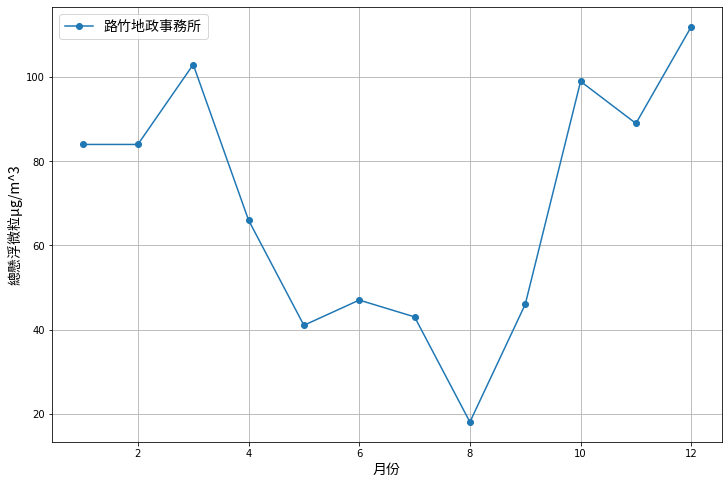

In [8]:
key = '路竹地政事務所'
# 請填入程式
plt.subplots(figsize=(12,8))
plt.plot(months, tsp_data[key], '-o', label=key)

plt.xlabel('月份', fontproperties = font)
plt.ylabel('總懸浮微粒μg/m^3', fontproperties = font)
plt.legend(prop=font)
plt.grid()

----
## 考題三：請設計一個你的個人介紹網頁，或是個人作品展示網頁，並架設到雲端平台上，讓全世界都可以看到你!

In [ ]:
# ps: 利用bootstrap的網頁框架，配合Heroku雲端平台，架設你自己專屬的網站!

----
## 考題四：設計一深度學習網路進行手寫文字的辨識。請繪出你的模型架構，並印出你的訓練成效。
